In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Change default figsize
plt.rc("figure", figsize=(14, 7))

## Table of Contents
* [1. Forex Data](#1)
* [2. Inflation rate](#2)
* [4. Foreign Direct Investment (FDI)](#3)
* [5. Correlation between all of the features](#4)

### **1. Forex Data <a class="anchor" id="1"></a>**

In [3]:
df_usd = pd.read_csv('../crawl/data/clean/df_usd.csv')
# Ensure 'Date' is in datetime format
df_usd['Date'] = pd.to_datetime(df_usd['Date'])
df = df_usd[df_usd['Date'] < '2024-01-01']
df

,Date,Buy Cash,Buy Transfer,Sell
0,2013-01-01,20760.0,20810.0,20860.0
1,2013-01-02,20770.0,20820.0,20860.0
2,2013-01-03,20770.0,20820.0,20860.0
3,2013-01-04,20770.0,20820.0,20860.0
4,2013-01-05,20765.0,20815.0,20855.0
...,...,...,...,...
4005,2023-12-27,24110.0,24140.0,24480.0
4006,2023-12-28,24030.0,24060.0,24400.0
4007,2023-12-29,24050.0,24080.0,24420.0
4008,2023-12-30,24050.0,24080.0,24420.0


In [4]:
df['Sell'].describe()

count     4010.000000
mean     22693.074065
std        941.990916
min      20840.000000
25%      22325.000000
50%      22835.000000
75%      23280.000000
max      25481.000000
Name: Sell, dtype: float64

- The interquartile range (IQR), which is the difference between the 75th and 25th percentiles, is 955. This indicates the middle 50% of the data is concentrated within this range, showing moderate variability.
- The close proximity of the median (22835) to the mean (22693.074065) suggests a relatively symmetrical distribution of exchange rates, though the presence of outliers (as indicated by the min and max values) could skew the distribution slightly.

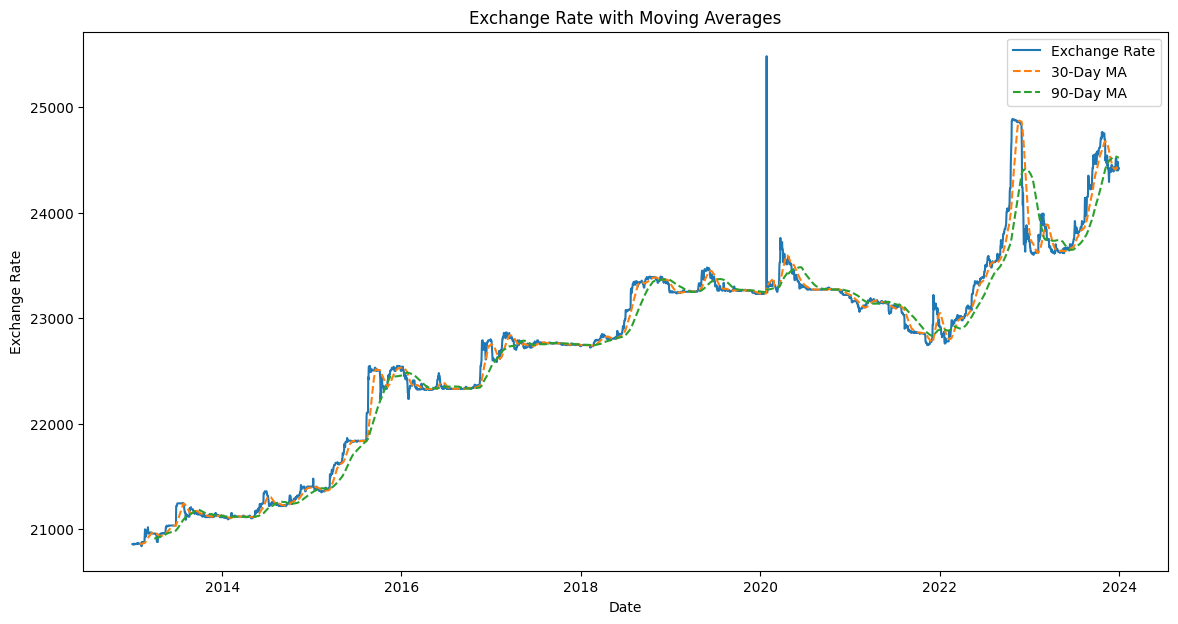

In [5]:
# Plot moving averages plot
df_tmp = df.copy()
df_tmp['MA30'] = df['Sell'].rolling(window=30).mean()
df_tmp['MA90'] = df['Sell'].rolling(window=90).mean()

plt.plot(df_tmp['Date'], df_tmp['Sell'], label='Exchange Rate')
plt.plot(df_tmp['Date'], df_tmp['MA30'], label='30-Day MA', linestyle='--')
plt.plot(df_tmp['Date'], df_tmp['MA90'], label='90-Day MA', linestyle='--')
plt.title('Exchange Rate with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

- From the beginning of the series (2013) to the end (2024), the exchange rate has experienced several significant fluctuations.
- There is a notable upward trend starting around early 2015, indicating a general increase in the exchange rate over this period.


In [6]:
df_tmp['Date'] = pd.to_datetime(df_tmp['Date'])
df_tmp.set_index('Date', inplace=True)

#### **Decomposition <a class="anchor" id="1_1"></a>**

Any time series distribution has 3 core components:
1. Seasonality - does the data have a clear cyclical/periodic pattern?
2. Trend - does the data represent a general upward or downward slope?
3. Noise - what are the outliers or missing values that are not consistent with the rest of the data?

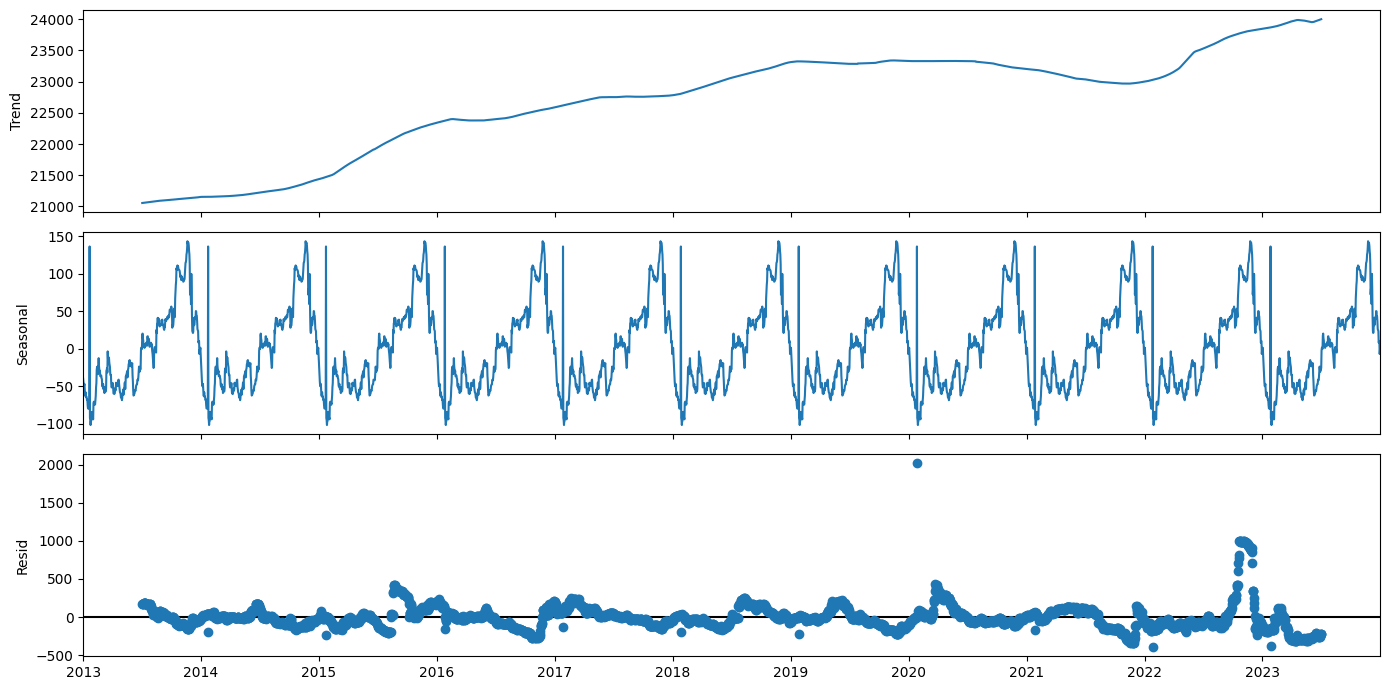

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_tmp['Sell'], model='additive', period=365)
result.plot(observed=False)
plt.show()

- The trend shows a slight decline around 2020, capturing the economic slowdown and uncertainty due to the pandemic.
- Despite the global disruptions from COVID-19, the overall trend remains stable, indicating recovery and stabilization efforts as economies adjusted to the pandemic's impacts and began to recover.

### **2. Inflation rates <a class="anchor" id="2"></a>**

In [8]:
df_inflation = pd.read_csv('../crawl/data/trading_economics/inflation_rate_month.csv')
df_inflation['Date'] = pd.to_datetime(df_inflation['month'], format='%d-%m-%y')
df = df_inflation[df_inflation['Date'] < '2024-01-01']
df

,month,inflation_rate_vn,inflation_rate_us,Date
0,01-01-13,0.0707,0.016,2013-01-01
1,01-02-13,0.0702,0.020,2013-02-01
2,01-03-13,0.0664,0.015,2013-03-01
3,01-04-13,0.0661,0.011,2013-04-01
4,01-05-13,0.0636,0.014,2013-05-01
...,...,...,...,...
127,01-08-23,0.0296,0.037,2023-08-01
128,01-09-23,0.0366,0.037,2023-09-01
129,01-10-23,0.0359,0.032,2023-10-01
130,01-11-23,0.0345,0.031,2023-11-01


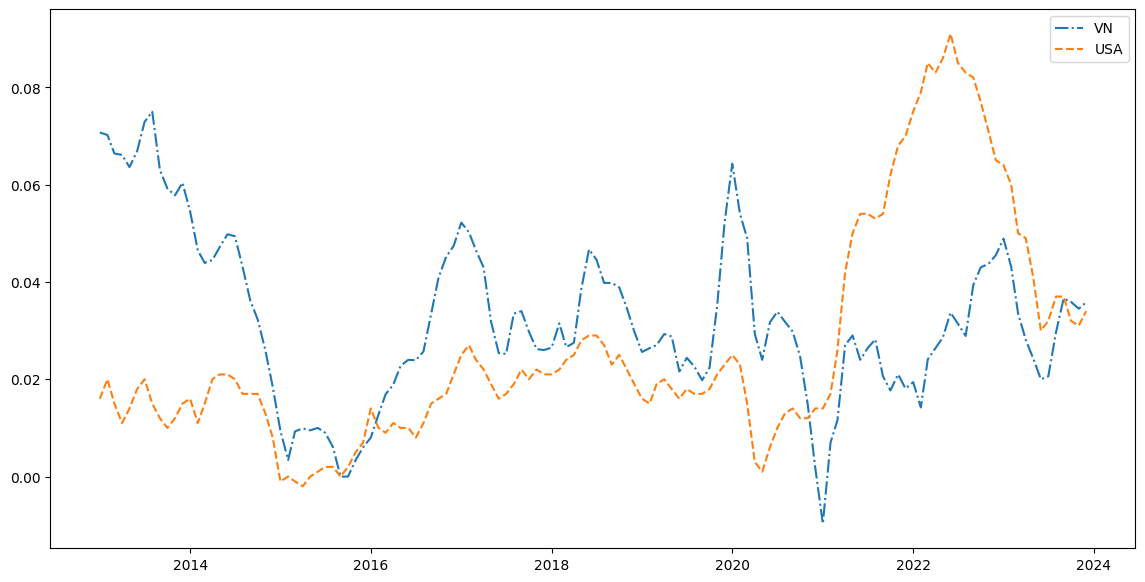

In [9]:
plt.plot(df['Date'], df['inflation_rate_vn'], label = "VN", linestyle="-.") 
plt.plot(df['Date'], df['inflation_rate_us'], label = "USA", linestyle="--") 
plt.legend() 
plt.show()

- The impact of the COVID-19 pandemic is evident in both countries' inflation data, but the USA experiences a more pronounced and sustained increase in inflation starting from 2021.
- Vietnam's inflation rate shows more frequent fluctuations and sharper peaks, possibly reflecting more immediate impacts of external economic shocks and policy measures.

### **3. Foreign Direct Investment (FDI) <a class="anchor" id="3"></a>**

In [11]:
df_unemploy = pd.read_csv('../crawl/data/trading_economics/df_fdi_quarter.csv')
df = df_unemploy[df_unemploy['Date'] < '2024-01-01']
df

,Date,fdi_vn,fdi_us
0,2013-01-01,1.390000,40.6
1,2013-04-01,4.676667,42.8
2,2013-07-01,7.626667,41.8
3,2013-10-01,10.560000,43.1
4,2014-01-01,1.480000,39.0
5,2014-04-01,4.783333,45.7
6,2014-07-01,7.866667,45.2
7,2014-10-01,11.266667,47.5
8,2015-01-01,1.586667,34.6
9,2015-04-01,5.150000,42.7


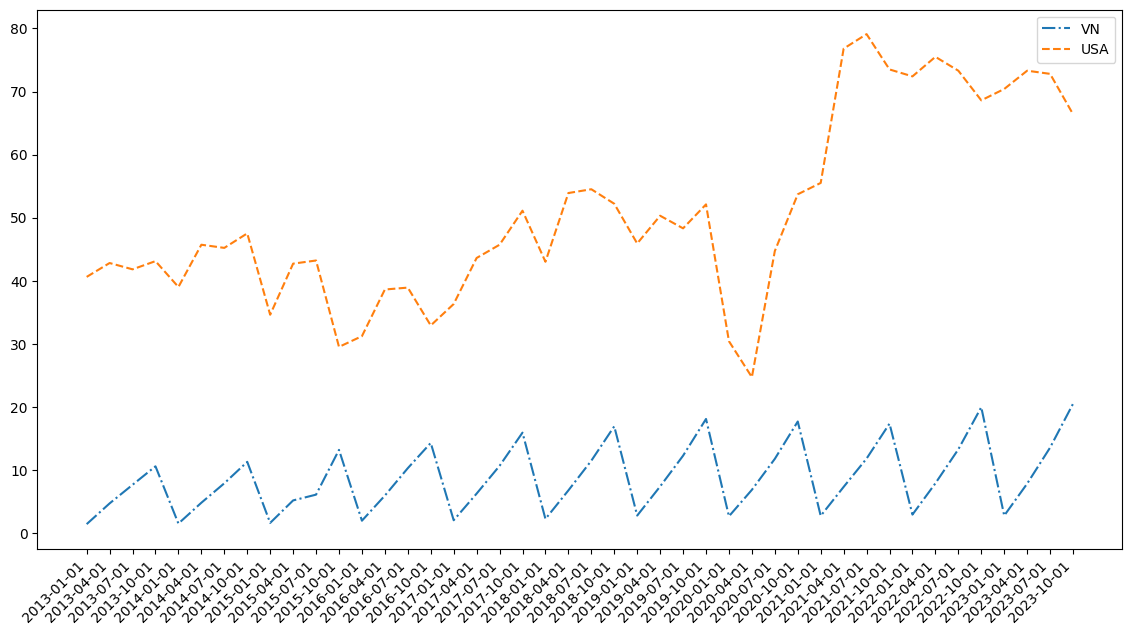

In [12]:
plt.plot(df['Date'], df['fdi_vn'], label = "VN", linestyle="-.") 
plt.plot(df['Date'], df['fdi_us'], label = "USA", linestyle="--") 
plt.xticks(rotation=45, ha='right')
plt.legend() 
plt.show()

- The US has a higher FDI than Vietnam over the time period shown
- The US shows a possible flat or slightly decreasing trend in FDI, while Vietnam exhibits a potential upward trend

### **4. Correlation between all of the features <a class="anchor" id="4"></a>**

In [13]:
import seaborn as sns

df_usd = pd.read_csv('../crawl/data/clean/df_combine.csv')
# Ensure 'Date' is in datetime format
df_usd['Date'] = pd.to_datetime(df_usd['Date'])
df = df_usd[df_usd['Date'] < '2024-01-01']
df.set_index('Date', inplace=True)
df

,Buy Cash,Buy Transfer,Sell,inflation_rate_vn,inflation_rate_us,fdi_vn,fdi_us
Date,,,,,,,
2013-01-01,20760.0,20810.0,20860.0,0.0707,0.016,1.390000,40.6
2013-01-02,20770.0,20820.0,20860.0,0.0707,0.016,1.390000,40.6
2013-01-03,20770.0,20820.0,20860.0,0.0707,0.016,1.390000,40.6
2013-01-04,20770.0,20820.0,20860.0,0.0707,0.016,1.390000,40.6
2013-01-05,20765.0,20815.0,20855.0,0.0707,0.016,1.390000,40.6
...,...,...,...,...,...,...,...
2023-12-27,24110.0,24140.0,24480.0,0.0358,0.034,20.476667,66.4
2023-12-28,24030.0,24060.0,24400.0,0.0358,0.034,20.476667,66.4
2023-12-29,24050.0,24080.0,24420.0,0.0358,0.034,20.476667,66.4


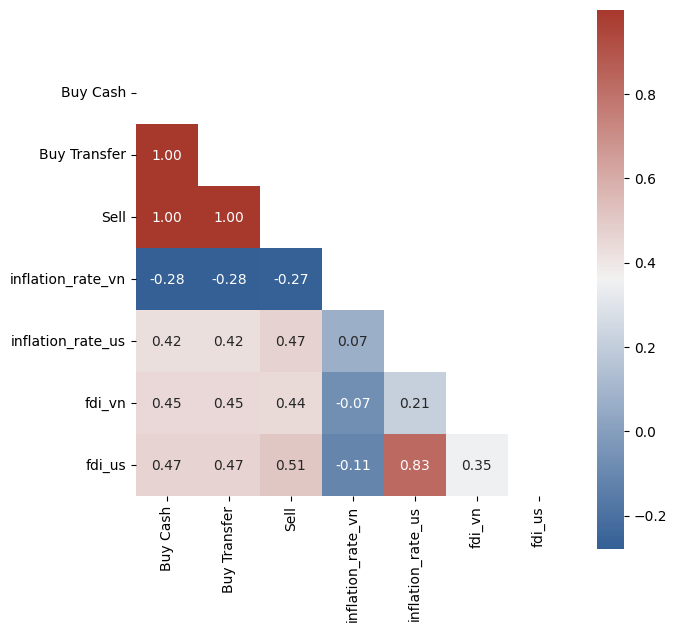

In [14]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = df.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show()

- Strong positive correlation: If two features have a strong positive correlation (dark blue), their values tend to move in the same direction. For example, a high buy cash rate might coincide with a high sell rate.
- Strong negative correlation: Conversely, a strong negative correlation (dark red) indicates the features tend to move in opposite directions. For instance, a high inflation rate in Vietnam (VN) might be associated with a lower sell rate.